<a href="https://colab.research.google.com/github/kaitsidis/ML102/blob/main/mobilenet50_adam_224180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
αυτό είναι για τη σύνσεδη με google drive

In [18]:
!nvidia-smi

Tue Jan 21 12:35:20 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# prompt: συνδεση με google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


παρακάτω δημιουργεί 3 φακέλους ανάλογα το λαβελ (0,1,2). για να δουλέψει προσαρμόστε το source_dir και το data αναλόγως της δομής στο drive σας

In [2]:
import os
import shutil
import pandas as pd

# Διαδρομή όπου βρίσκονται όλα τα αρχεία
#source_dir = '/content/drive/MyDrive/detect-pneumonia-fall-2024-25/train_images/train_images'  # Ο φάκελος που περιέχει όλες τις εικόνες
#destination_dir = '/content/drive/MyDrive/detect-pneumonia-fall-2024-25/train_images/data/train_images'  # Ο βασικός φάκελος με τις κατηγορίες

source_dir = '/content/drive/MyDrive/ML102/train_images'  # Ο φάκελος που περιέχει όλες τις εικόνες
destination_dir = '/content/drive/MyDrive//ML102/train_bycategory_images'  # Ο βασικός φάκελος με τις κατηγορίες


# Καθορισμός κατηγοριών (υποθέτουμε ότι έχετε CSV αρχείο με ετικέτες)
categories = {0: "no_pneumonia", 1: "viral_pneumonia", 2: "bacterial_pneumonia"}
csv_file = "data/labels.csv"  # Αρχείο CSV που περιέχει τις ετικέτες

# Δημιουργία φακέλων για τις κατηγορίες
#for category in categories.values():
#    os.makedirs(os.path.join(destination_dir, category), exist_ok=True)

# Φόρτωση του CSV αρχείου
# Υποθέτουμε ότι το CSV έχει στήλες "filename" και "label"
data = pd.read_csv('/content/drive/MyDrive/ML102/labels_train.csv')


# Μετακίνηση αρχείων στους αντίστοιχους φακέλους
for _, row in data.iterrows():
    file_name = row['file_name']  # Όνομα αρχείου
    label = row['class_id']         # Ετικέτα (0, 1, 2)



    # Ορισμός διαδρομών
    src_path = os.path.join(source_dir, file_name)
    dest_path = os.path.join(destination_dir, categories[label], file_name)

    # Μετακίνηση αρχείου
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Το αρχείο {file_name} δεν βρέθηκε. Παραλείπεται.")

print("Η οργάνωση ολοκληρώθηκε!")


Το αρχείο img_4358977458434011046.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_5224016757187192130.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3065202206106254707.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_6304894865561547174.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3371338542810939877.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_946797649386887230.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3282952127033205295.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_3090153597350897926.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4875755942606271156.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4787814488043878610.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_4125543106305495129.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_2823915539277173272.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_7230268662919234934.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_6848561975587852457.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_920571004437917321.jpg δεν βρέθηκε. Παραλείπεται.
Το αρχείο img_5530061828133

εδω κάνει κανονικοποίηση στις εικόνες και τις χωρίζει σε training και validation. θέλει προσαρμογή το data_dir

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Ορισμός διαδρομής δεδομένων
#data_dir = '/content/drive/MyDrive/ML102/test_images'  # Βασικός φάκελος με τα δεδομένα
data_dir = '/content/drive/MyDrive//ML102/train_bycategory_images'

# Παράμετροι για την προετοιμασία
img_height, img_width = 224, 180  # Στόχο μέγεθος εικόνας
batch_size = 32                  # Μέγεθος παρτίδας (batch)

# Χρήση ImageDataGenerator για προεπεξεργασία και ενίσχυση δεδομένων
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Κανονικοποίηση τιμών pixel στο [0, 1]
    validation_split=0.2,  # Διαχωρισμός δεδομένων σε train/validation
    rotation_range=20,  # Περιστροφή εικόνας
    width_shift_range=0.2,  # Μετατόπιση πλάτους
    height_shift_range=0.2,  # Μετατόπιση ύψους
    shear_range=0.2,  # Σχισίματα
    zoom_range=0.2,  # Ζουμ
    horizontal_flip=True  # Οριζόντια αναστροφή
)

# Create train_generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training'  # Specify subset for training data
)


Found 3739 images belonging to 3 classes.


δειχνει ενα υποσύνολο εικόνων

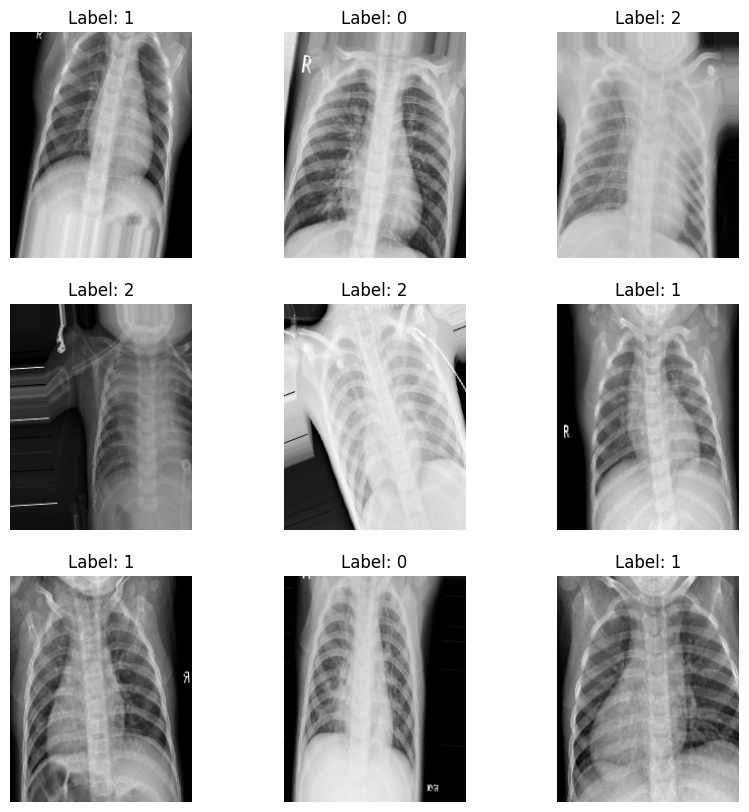

In [4]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy and assign it to the alias 'np'


# Λήψη ενός batch από το train_generator

sample_batch = next(train_generator)
images, labels = sample_batch

# Οπτικοποίηση 9 δειγμάτων εικόνας
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    predicted_class = np.argmax(labels[i])
    plt.title(f"Label: {predicted_class}")
#    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
plt.show()


εδω ορίζεται ως μοντέλο το mobilenetv2 και το προετοιμάζει

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf # Import tensorflow here

# Ορισμός img_height και img_width εδώ, εφόσον δεν έχουν οριστεί αλλού
img_height, img_width = 224, 180

# Φόρτωση προεκπαιδευμένου MobileNetV2
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Πάγωμα των προκαθορισμένων στρώσεων

# Προσθήκη προσαρμοσμένων στρώσεων
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Now tf is defined
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)  # 3 κατηγορίες

model = Model(inputs=base_model.input, outputs=output)

# Σύνταξη του μοντέλου
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Σύνοψη του μοντέλου
model.summary()

<ipython-input-5-b75495db8afc>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 90, 32)    │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 90, 32)    │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 90, 32)    │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 90, 32)    │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 90, 32)    │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 90, 32)    │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 90, 16)    │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 90, 16)    │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 90, 96)    │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 90, 96)    │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 90, 96)    │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 91, 96)    │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 45, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

εδω ξεκινάει η εκπαίδευση. μπορείτε να παίξετε με τις εποχές

In [6]:
# Create validation_generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Changed to 'sparse'
    subset='training'  # Specify subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Changed to 'sparse'
    subset='validation'  # Specify subset for validation data
)


# Εκπαίδευση του μοντέλου
epochs = 10

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)


Found 3739 images belonging to 3 classes.
Found 933 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1766s 14s/step - accuracy: 0.6104 - loss: 0.8907 - val_accuracy: 0.7095 - val_loss: 0.6383
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 100s 823ms/step - accuracy: 0.7010 - loss: 0.6781 - val_accuracy: 0.7460 - val_loss: 0.6039
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 141s 812ms/step - accuracy: 0.7267 - loss: 0.6363 - val_accuracy: 0.7642 - val_loss: 0.5789
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 145s 827ms/step - accuracy: 0.7471 - loss: 0.5965 - val_accuracy: 0.7460 - val_loss: 0.5724
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 104s 840ms/step - accuracy: 0.7562 - loss: 0.5957 - val_accuracy: 0.7567 - val_loss: 0.5671
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 140s 841ms/step - accuracy: 0.7586 - loss: 0.5822 - val_accuracy: 0.7513 - val_loss: 0.6116
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 142s 843ms/step - accuracy: 0.7601 - loss: 0.5780 - val_accuracy: 0.7642 - val_loss: 0.5634
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 143s 840ms/step - accuracy: 0.7749 - loss: 0.553

δείχνει τις κύριες μετρικές

In [7]:
# Αξιολόγηση στο validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - accuracy: 0.7612 - loss: 0.5655
Validation Loss: 0.5487498641014099
Validation Accuracy: 0.7695605754852295


γραφηματα

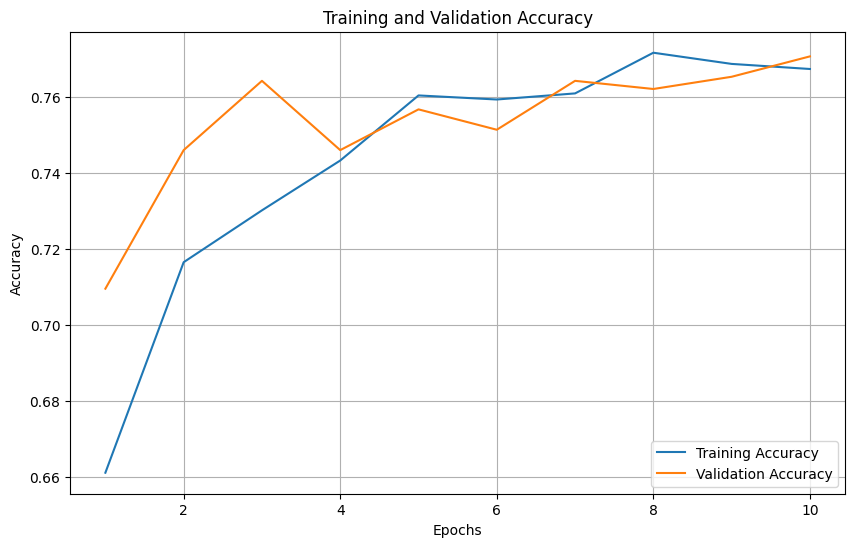

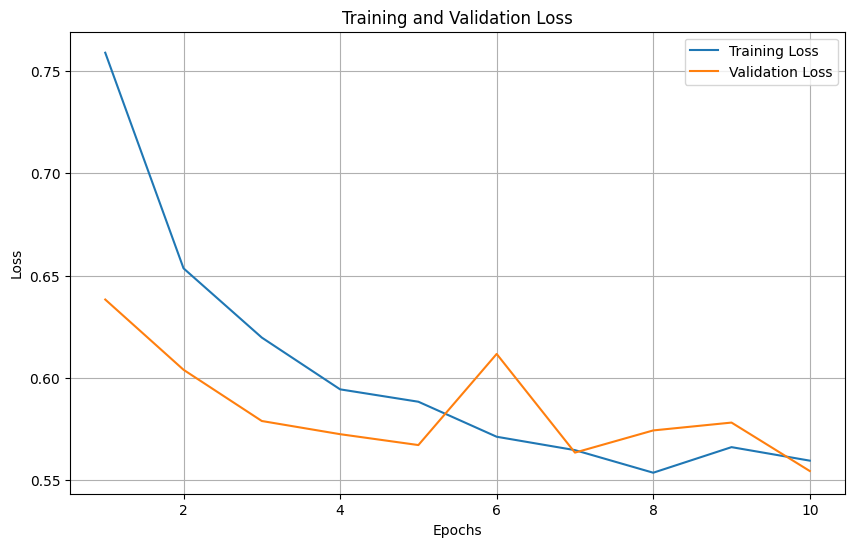

In [8]:
import matplotlib.pyplot as plt

# Υποθέτουμε ότι έχετε το ιστορικό εκπαίδευσης
# από την εκπαίδευση του μοντέλου
# π.χ. history = model.fit(...)

# Ανάκτηση δεδομένων από το ιστορικό
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Αριθμός εποχών
epochs = range(1, len(acc) + 1)

# Γράφημα Ακρίβειας
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Γράφημα Απώλειας
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


σωζει το εκπαιδευμένο μοντέλο

In [9]:
model.save('/content/drive/My Drive/ML102/pneumonia_MobiNet_adam_224x180.h5')


εδω ξεπαγωνει κάποια επίπεδα για βελτιστοποίηση. προαιρετικο

In [22]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


εδω περνάει το συνολο των test ακτίνων και τις κατατάσει καταγράφοντας τις σε ένα αρχειο cvs. λογικά είναι αυτό που θα ανεβάζουμε στο kaggle


In [26]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Διαδρομές
test_dir = "/content/drive/MyDrive/ML102/test_images"  # Ο φάκελος με τις test εικόνες
model_path = "/content/drive/My Drive/ML102/pneumonia_MobiNet_adam_224x180.h5"  # Αρχείο μοντέλου # Changed this line to include the full path
output_csv = "test_predictions_adam224x180.csv"  # Όνομα αρχείου CSV

if not any(fname.lower().endswith(('.png', '.jpg', '.jpeg')) for fname in os.listdir(test_dir)):
    raise ValueError(f"No valid image files found in {test_dir}. Please check the directory contents.")


ppath = os.listdir(test_dir)

print(ppath)

# Φόρτωση του μοντέλου
model = load_model(model_path)

# Προετοιμασία των δεδομένων
img_height, img_width = 224, 180  # Το μέγεθος των εικόνων (πρέπει να ταιριάζει με το μέγεθος εκπαίδευσης)
batch_size = 32

# Δημιουργία ImageDataGenerator για τα test δεδομένα
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Κανονικοποίηση
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # Χωρίς ετικέτες, μόνο εικόνες
    shuffle=False  # Διατήρηση της σειράς των εικόνων
)

print(test_generator.samples)


# Προβλέψεις
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Λίστα με τα ονόματα των εικόνων
file_names = test_generator.filenames

# Δημιουργία DataFrame για το CSV
results = pd.DataFrame({
    "file_name": [os.path.basename(f) for f in file_names],
    "class_id": predicted_classes
})

# Αποθήκευση σε αρχείο CSV
results.to_csv(output_csv, index=False)

print(f"Οι προβλέψεις αποθηκεύτηκαν στο αρχείο {output_csv}")


['img_132024516253214402.jpg', 'img_1369081416880556913.jpg', 'img_1608884185818341737.jpg', 'img_1125305094391727652.jpg', 'img_1826130231820739247.jpg', 'img_1223654159476859553.jpg', 'img_1037910048520457739.jpg', 'img_1477479086216980236.jpg', 'img_159167644943409549.jpg', 'img_1581826477875631396.jpg', 'img_1870506046674880480.jpg', 'img_1056493789828791097.jpg', 'img_1508041442905435888.jpg', 'img_1713224163938910130.jpg', 'img_1844254636558483176.jpg', 'img_1498425366667951032.jpg', 'img_1102208210595046337.jpg', 'img_1540470346968029424.jpg', 'img_1294845672711394260.jpg', 'img_16543453932950536.jpg', 'img_1307931683460582151.jpg', 'img_1523934492612473110.jpg', 'img_1918697283940589822.jpg', 'img_1731353163814999872.jpg', 'img_1922082027129315425.jpg', 'img_1069295317302009938.jpg', 'img_1945074002506083740.jpg', 'img_1289148150235016680.jpg', 'img_1393298377401141978.jpg', 'img_1496593934902352483.jpg', 'img_1825895554685637076.jpg', 'img_1657280907627590335.jpg', 'img_174597

Found 0 images belonging to 0 classes.
0


ValueError: Must provide at least one structure